In [1]:
import numpy as np
import matplotlib.pyplot as plt

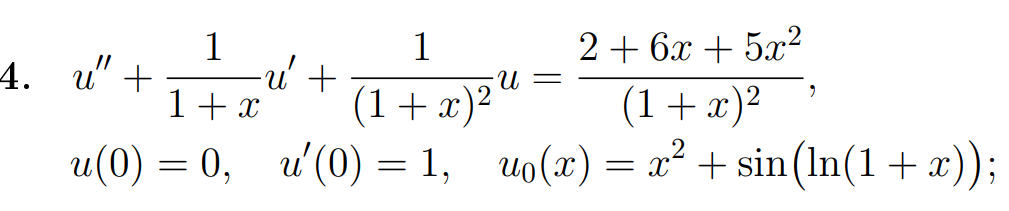

In [2]:
def f_x_u(x, u_1, u):
    return x #(2 + 6*x + 5*x*x)/(1+x*x) - u_1/(1+x) - u/((1+x)*(1+x))
def f_x(x):
    return x*x*x/3 #x*x + np.sin(np.log(1 + x))

In [3]:
h = 0.05
a = 0
b = 1
N = int((b-a)/h)
x_0 = np.linspace(a, b, N)


h1 = 0.1
N_1 = int((b-a)/h1)
x_1 = np.linspace(a, b, N_1)

u = [0]*len(x_0)
u1 = [0]*len(x_0)
u_true = [f_x(x_0[i]) for i in range(len(x_0))]

u1[0] = 0 #1
u[0] = 0

# Метод Эйлера
for i in range(1, len(x_0)):
    u[i] = u[i-1] + h*u1[i-1] 
    u1[i] = u1[i-1] + h * f_x_u(x_0[i-1], u[i-1], u1[i-1])

In [4]:
u_r = [0]*len(x_0)
u1 = [0]*len(x_0)

u1[0] = 0 #1
u_r[0] = 0

# Метод Рунге-Кутты

for i in range(1, len(x_0)):
    
    k1 = u1[i-1]
    k2 = u1[i-1] + k1*(h/2)
    k3 = u1[i-1] + k2*(h/2)
    k4 = u1[i-1] + k3*h
    
    u_r[i] = u_r[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    k1 = f_x_u(x_0[i-1], u1[i-1], u_r[i-1])
    k2 = f_x_u(x_0[i-1] + h/2, u1[i-1] + k1*h/2, u_r[i-1])
    k3 = f_x_u(x_0[i-1] + h/2, u1[i-1] + k2*h/2, u_r[i-1])
    k4 = f_x_u(x_0[i-1] + h, u1[i-1] + h*k3, u_r[i-1])
    
    u1[i] = u1[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4) 

In [5]:
u_a = [0]*len(x_0)
u1 = [0]*len(x_0)

u_a[0] = 0
u1[0] = 0 #1

# Метод Адамса

for i in range(1, len(x_0)):
    if i < 3:
        u_a[i] = u_r[i]
        
    else:    
        u_a[i] = u_a[i-1] + (h/12)*(23*u1[i-1] - 16*u1[i-2] + 5*u1[i-3])
        u1[i] = u1[i-1] + (h/12)*(23*f_x_u(x_0[i-1], u_a[i-1], u1[i-1]) - 16*f_x_u(x_0[i-2], u_a[i-2], u1[i-2]) + 5*f_x_u(x_0[i-3], u_a[i-3], u1[i-3])) 

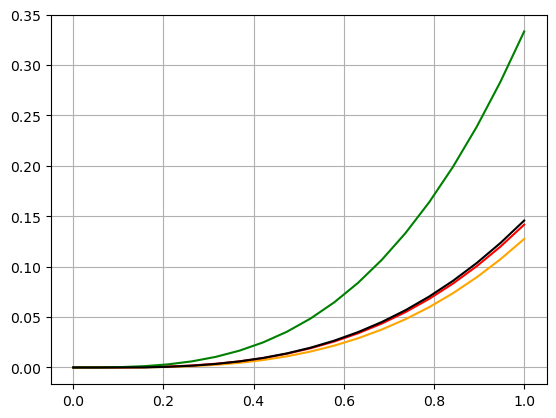

In [6]:
plt.grid(visible = True)
plt.plot(x_0, u, color = 'orange')# Метод Эйлера
plt.plot(x_0, u_r, color = 'red')# Рунге-Кутты
plt.plot(x_0, u_true, color = 'green')# Теоретическое
plt.plot(x_0, u_a, color = 'black'); # Метод Адамса

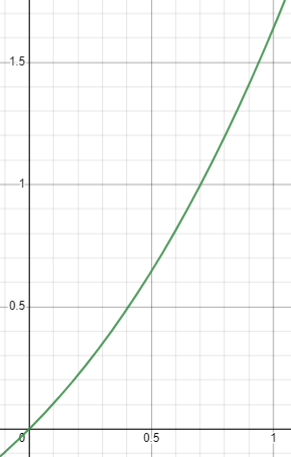

In [7]:
# График ошибки
h = 0.1
a = 0
b = 1
N = int((b-a)/h)
x_1 = np.linspace(a, b, N)

def f_diff(y0, y1):
    return (1/15)*abs(y1 - y0)



diff_arr = [] # Для разностей

u_0_1 = [0]*len(x_1) # Для шага 0.1

u_r_1 = [0]*len(x_1) 

u_0_1[0] = 1
u_r_1[0] = 0

u_new = []

for i in range(1, len(x_1)):
    
    k1 = u_0_1[i-1]
    k2 = u_0_1[i-1] + k1*(h/2)
    k3 = u_0_1[i-1] + k2*(h/2)
    k4 = u_0_1[i-1] + k3*h
    
    u_r_1[i] = u_r_1[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    k1 = f_x_u(x_1[i-1], u_0_1[i-1], u_r_1[i-1])
    k2 = f_x_u(x_1[i-1] + h/2, u_0_1[i-1] + k1*h/2, u_r_1[i-1])
    k3 = f_x_u(x_1[i-1] + h/2, u_0_1[i-1] + k2*h/2, u_r_1[i-1])
    k4 = f_x_u(x_1[i-1] + h, u_0_1[i-1] + h*k3, u_r_1[i-1])
    
    u_0_1[i] = u_0_1[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4) 
    
for i in range(len(x_1)):
    u_new.append(u_r[2*i])
    diff_arr.append(f_diff(u_new[i], u_r_1[i]))

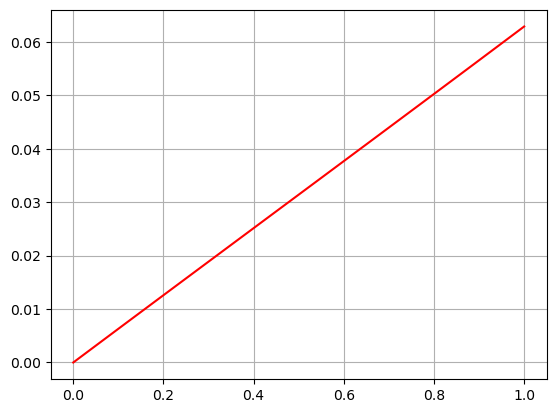

In [8]:
plt.grid(visible = True)
#plt.plot(x_1, u_r_1)
#plt.plot(x_1, u_new)
plt.plot(x_1, diff_arr, color = 'red');